In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
pd.set_option('display.max_columns', 500)

In [3]:
raw = pd.read_csv('../data/MULTI_trust_round9_raw.csv')

In [4]:
raw.head()

,essround,idno,cntry,trstprl,trstplt,trstep,prtvede1,prtvtdfr,prtvtfhu,prtvtcit,prtvtdpl,euftf,Unnamed: 12
0,9,17,AT,5,5,5,NaN,NaN,NaN,NaN,NaN,10,NaN
1,9,31,AT,5,3,2,NaN,NaN,NaN,NaN,NaN,2,NaN
2,9,58,AT,5,5,5,NaN,NaN,NaN,NaN,NaN,5,NaN
3,9,69,AT,2,2,2,NaN,NaN,NaN,NaN,NaN,2,NaN
4,9,98,AT,7,3,5,NaN,NaN,NaN,NaN,NaN,5,NaN


In [5]:
countries = ['DE','FR','IT','HU','PL']

In [6]:
raw = raw[raw['cntry'].isin(countries)].drop(columns='Unnamed: 12').reset_index(drop=True)

In [7]:
cols = {'essround':'round',
        'cntry':'country',
        'trstprl':'t_parlament',
        'trstplt':'t_politicians',
        'trstep':'t_eu_par', 
        'euftf':'eu_further',
        'prtvede1':'party_de',
        'prtvtdfr':'party_fr', 
        'prtvtfhu':'party_hu', 
        'prtvtcit':'party_it', 
        'prtvtdpl':'party_pl' }

In [8]:
df = raw.rename(columns=cols)

In [9]:
df.head()

,round,idno,country,t_parlament,t_politicians,t_eu_par,party_de,party_fr,party_hu,party_it,party_pl,eu_further
0,9,1,DE,4,5,7,4.0,NaN,NaN,NaN,NaN,9
1,9,63,DE,6,6,7,66.0,NaN,NaN,NaN,NaN,6
2,9,108,DE,88,88,88,66.0,NaN,NaN,NaN,NaN,88
3,9,117,DE,6,5,6,1.0,NaN,NaN,NaN,NaN,7
4,9,134,DE,8,5,5,1.0,NaN,NaN,NaN,NaN,10


### Now we slice our df and create different subsets for each country
#### DE

In [10]:
de = df[df['country']== 'DE'].drop(columns=['party_fr','party_hu','party_it','party_pl']).reset_index(drop=True)

##### In order to falicitate our analysis on the level of trust in the institutions, I´m gonna drop all the rows where respondents answered with 77(refusal), 88(don´t know), 99(no answer)



In [11]:
de.shape

(2358, 8)

In [12]:
de = de[(~de['t_parlament'].isin([77,88,99]))
      &(~de['t_politicians'].isin([77,88,99]))
      &(~de['t_eu_par'].isin([77,88,99]))
      &(~de['eu_further'].isin([77,88,99]))]

In [13]:
de.shape

(2227, 8)

In [14]:
de.head()

,round,idno,country,t_parlament,t_politicians,t_eu_par,party_de,eu_further
0,9,1,DE,4,5,7,4.0,9
1,9,63,DE,6,6,7,66.0,6
3,9,117,DE,6,5,6,1.0,7
4,9,134,DE,8,5,5,1.0,10
5,9,147,DE,4,2,5,1.0,7


In [15]:
#### Now we divide again our df in 3: 
#### de_f: those who voted for AfD (party==6)  or NPD(party==8)
#### de_novot: those who didn´t vote (party == 66)
#### de_nof: the rest (also excluding those who didn´t answer(77) or didn´t know(88)

In [16]:
de_f = de[de["party_de"].isin([6,8])]

In [17]:
de_novot = de[de["party_de"] == 66]

In [18]:
de_nof = de[~de["party_de"].isin([6,8,66,77,88])]

#### FR

In [19]:
fr=df[df['country']== 'FR'].drop(columns=['party_de','party_hu','party_it','party_pl']).reset_index(drop=True)

In [20]:
fr.shape

(2010, 8)

In [21]:
fr = fr[(~fr['t_parlament'].isin([77,88,99]))
      &(~fr['t_politicians'].isin([77,88,99]))
      &(~fr['t_eu_par'].isin([77,88,99]))
      &(~fr['eu_further'].isin([77,88,99]))]

In [22]:
fr.shape

(1813, 8)

In [23]:
fr.head()

,round,idno,country,t_parlament,t_politicians,t_eu_par,party_fr,eu_further
0,9,13,FR,8,4,4,88.0,10
1,9,26,FR,1,7,9,66.0,6
2,9,28,FR,2,2,1,7.0,8
3,9,39,FR,8,6,7,9.0,8
5,9,118,FR,2,2,3,66.0,8


In [24]:
#### fr_f: those who voted for FN (party==11)  
#### fr_novot: those who didn´t vote (party == 66)
#### fr_nof: the rest (also excluding those who didn´t answer(77) or didn´t know(88)

In [25]:
fr_f = fr[fr["party_fr"] == 11]

In [26]:
fr_novot = fr[fr["party_fr"] == 66]

In [27]:
fr_nof = fr[~fr["party_fr"].isin([11,66,77,88])]

#### IT

In [28]:
it=df[df['country']== 'IT'].drop(columns=['party_de','party_hu','party_fr','party_pl']).reset_index(drop=True)

In [29]:
it.shape

(2745, 8)

In [30]:
it = it[(~it['t_parlament'].isin([77,88,99]))
      &(~it['t_politicians'].isin([77,88,99]))
      &(~it['t_eu_par'].isin([77,88,99]))
      &(~it['eu_further'].isin([77,88,99]))]

In [31]:
it.shape

(2416, 8)

In [32]:
it.head()

,round,idno,country,t_parlament,t_politicians,t_eu_par,party_it,eu_further
0,9,5,IT,8,5,4,7.0,8
1,9,11,IT,6,0,3,8.0,0
4,9,46,IT,6,4,4,66.0,6
5,9,80,IT,6,6,6,77.0,6
6,9,89,IT,0,0,0,77.0,1


In [33]:
#### it_f: those who voted for Lega (party==9)  
#### it_novot: those who didn´t vote (party == 66)
#### it_nof: the rest (also excluding those who didn´t answer(77) or didn´t know(88)

In [34]:
it_f = it[it["party_it"] == 9]

In [35]:
it_novot = it[it["party_it"] == 66]

In [36]:
it_nof = it[~it["party_it"].isin([9,66,77,88])]

#### PL

In [37]:
pl=df[df['country']== 'PL'].drop(columns=['party_de','party_hu','party_it','party_fr']).reset_index(drop=True)

In [38]:
pl.shape

(1500, 8)

In [39]:
pl = pl[(~pl['t_parlament'].isin([77,88,99]))
      &(~pl['t_politicians'].isin([77,88,99]))
      &(~pl['t_eu_par'].isin([77,88,99]))
      &(~pl['eu_further'].isin([77,88,99]))]

In [40]:
pl.shape

(1296, 8)

In [41]:
pl.head()

,round,idno,country,t_parlament,t_politicians,t_eu_par,party_pl,eu_further
0,9,25,PL,3,5,0,6.0,5
1,9,35,PL,5,3,5,2.0,4
3,9,133,PL,5,3,3,6.0,3
4,9,179,PL,5,5,5,66.0,9
5,9,212,PL,0,3,8,77.0,6


In [42]:
#### pl_f: those who voted for PiS (party==6)  
#### pl_novot: those who didn´t vote (party == 66)
#### pl_nof: the rest (also excluding those who didn´t answer(77) or didn´t know(88)

In [43]:
pl_f = pl[pl['party_pl']== 6]

In [44]:
pl_novot = pl[pl['party_pl']== 66]

In [45]:
pl_nof = pl[~pl['party_pl'].isin([6,66,77,88])]

#### HU

In [46]:
hu=df[df['country']== 'HU'].drop(columns=['party_de','party_pl','party_it','party_fr']).reset_index(drop=True)

In [47]:
hu.shape

(1698, 8)

In [48]:
hu = hu[(~hu['t_parlament'].isin([77,88,99]))
      &(~hu['t_politicians'].isin([77,88,99]))
      &(~hu['t_eu_par'].isin([77,88,99]))
      &(~hu['eu_further'].isin([77,88,99]))]

In [49]:
hu.shape

(1454, 8)

In [50]:
hu.head()

,round,idno,country,t_parlament,t_politicians,t_eu_par,party_hu,eu_further
1,9,84,HU,5,2,5,77.0,5
2,9,126,HU,3,5,8,3.0,3
3,9,153,HU,1,5,9,7.0,0
4,9,165,HU,1,7,10,3.0,1
6,9,169,HU,1,1,3,5.0,0


In [51]:
#### hu_f: those who voted for Fidesz (party==3)  
#### hu_novot: those who didn´t vote (party == 66)
#### hu_nof: the rest (also excluding those who didn´t answer(77) or didn´t know(88)

In [52]:
hu_f = hu[hu['party_hu']== 3]

In [53]:
hu_novot = hu[hu['party_hu']== 66]

In [54]:
hu_nof = hu[~hu['party_hu'].isin([3,66,77,88])]

### We start comparing now
### t_parlament: Trust in country´s parliament
##### 0 (not at all) - 10 (complete trust), 77(refusal), 88(don´t know), 99(no answer)
#### DE

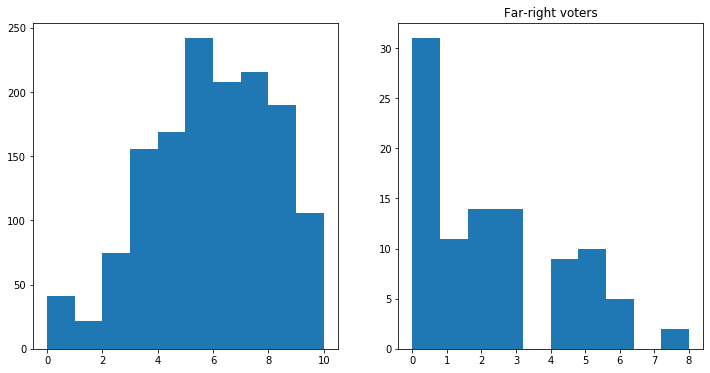

In [67]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
axes[0].hist(de_nof['t_parlament']);
axes[1].hist(de_f['t_parlament']);
axes[1].set_title("Far-right voters");

#### FR

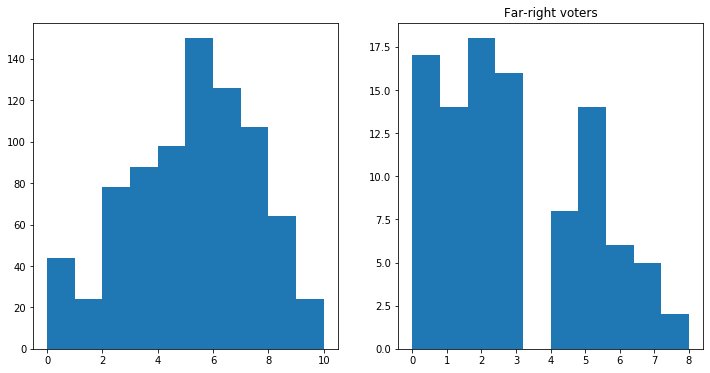

In [61]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
axes[0].hist(fr_nof['t_parlament']);
axes[1].hist(fr_f['t_parlament']);
axes[1].set_title("Far-right voters");

#### IT

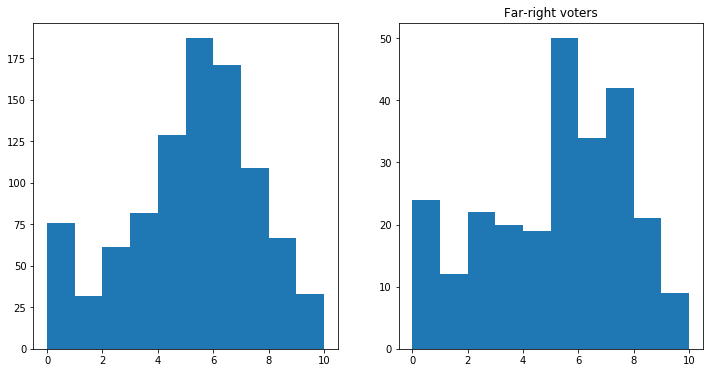

In [62]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
axes[0].hist(it_nof['t_parlament']);
axes[1].hist(it_f['t_parlament']);
axes[1].set_title("Far-right voters");

#### PL

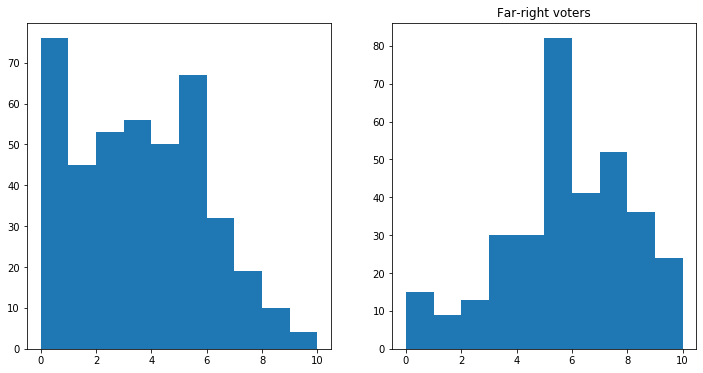

In [65]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
axes[0].hist(pl_nof['t_parlament']);
axes[1].hist(pl_f['t_parlament']);
axes[1].set_title("Far-right voters");

#### HU

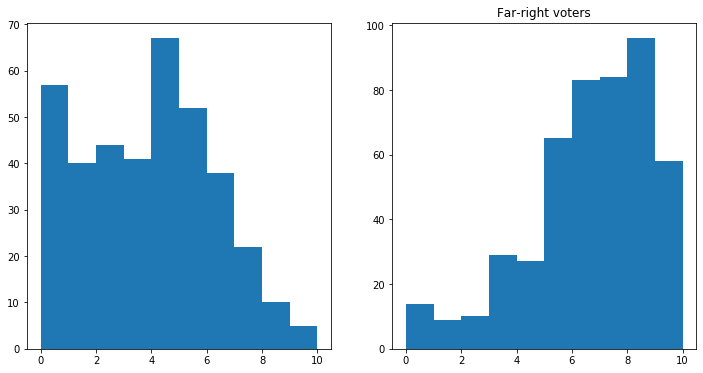

In [66]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
axes[0].hist(hu_nof['t_parlament']);
axes[1].hist(hu_f['t_parlament']);
axes[1].set_title("Far-right voters");

### t_politicians: Trust in politicians
##### 0 (not at all) - 10 (complete trust), 77, 88, 99
#### DE

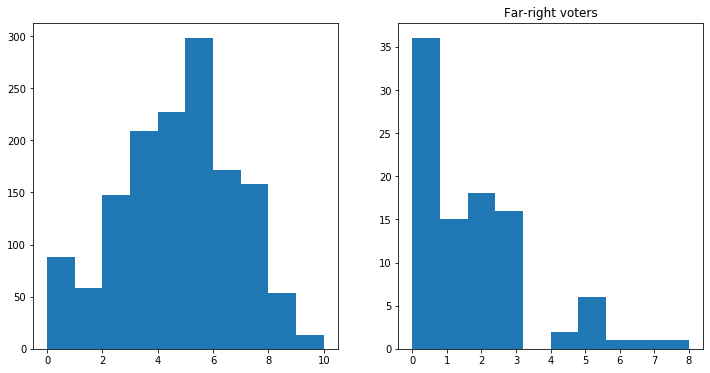

In [68]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
axes[0].hist(de_nof['t_politicians']);
axes[1].hist(de_f['t_politicians']);
axes[1].set_title("Far-right voters");

#### FR

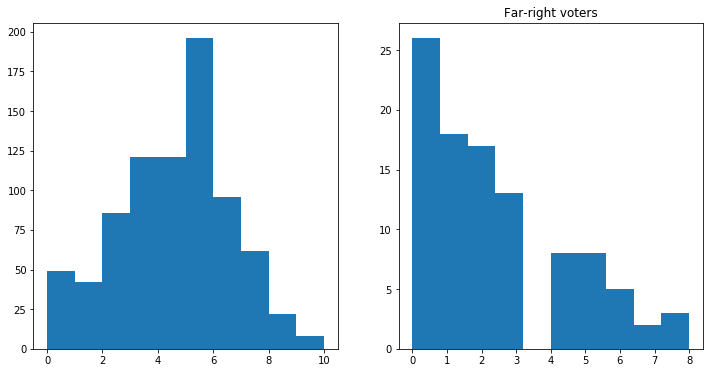

In [69]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
axes[0].hist(fr_nof['t_politicians']);
axes[1].hist(fr_f['t_politicians']);
axes[1].set_title("Far-right voters");

#### IT

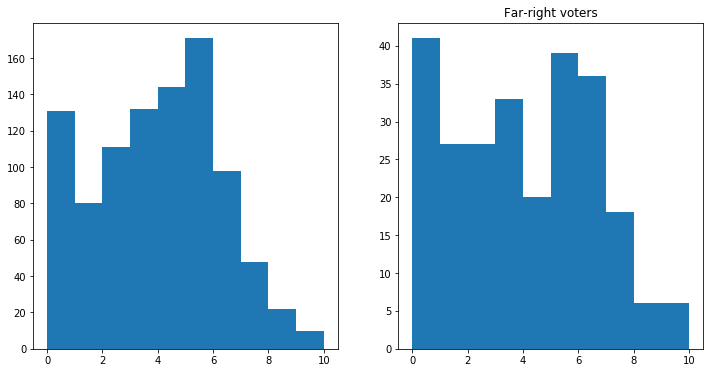

In [70]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
axes[0].hist(it_nof['t_politicians']);
axes[1].hist(it_f['t_politicians']);
axes[1].set_title("Far-right voters");

#### PL

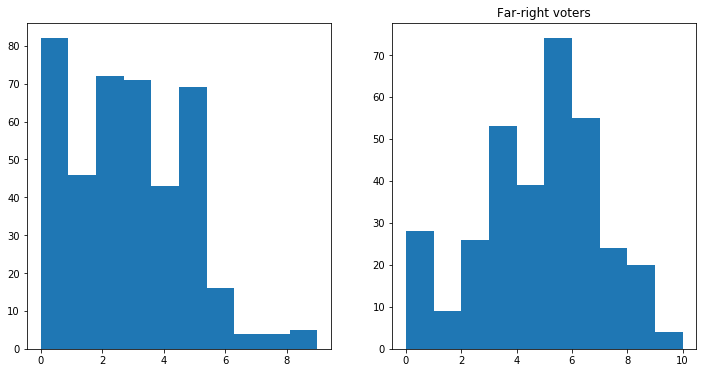

In [71]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
axes[0].hist(pl_nof['t_politicians']);
axes[1].hist(pl_f['t_politicians']);
axes[1].set_title("Far-right voters");

#### HU

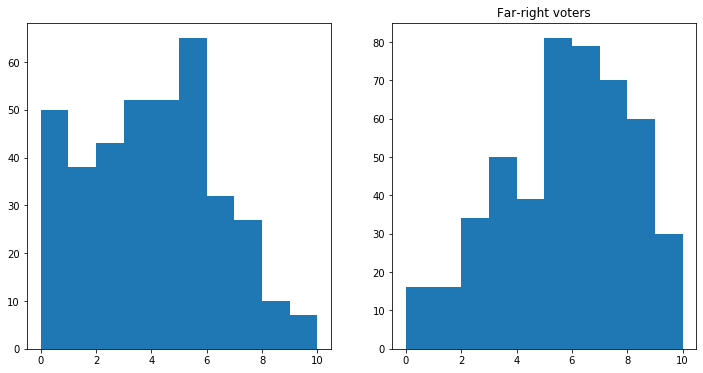

In [72]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
axes[0].hist(hu_nof['t_politicians']);
axes[1].hist(hu_f['t_politicians']);
axes[1].set_title("Far-right voters");

### t_eu_par: Trust in the European Parliament
##### 0 (not at all) - 10 (complete trust), 77, 88, 99
#### DE

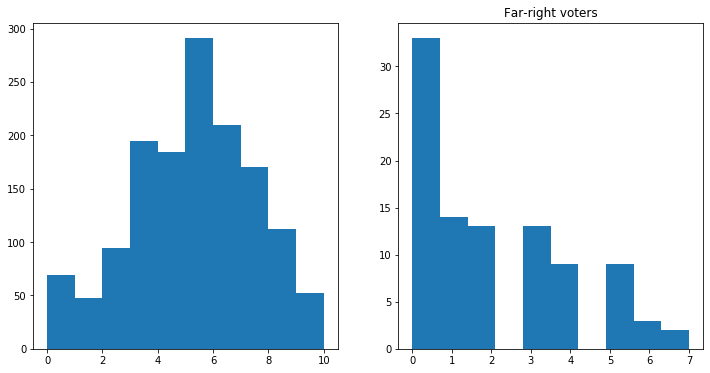

In [74]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
axes[0].hist(de_nof['t_eu_par']);
axes[1].hist(de_f['t_eu_par']);
axes[1].set_title("Far-right voters");

#### FR

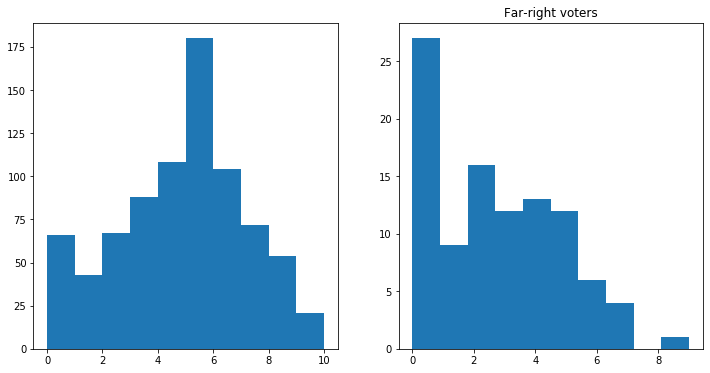

In [75]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
axes[0].hist(fr_nof['t_eu_par']);
axes[1].hist(fr_f['t_eu_par']);
axes[1].set_title("Far-right voters");

#### IT

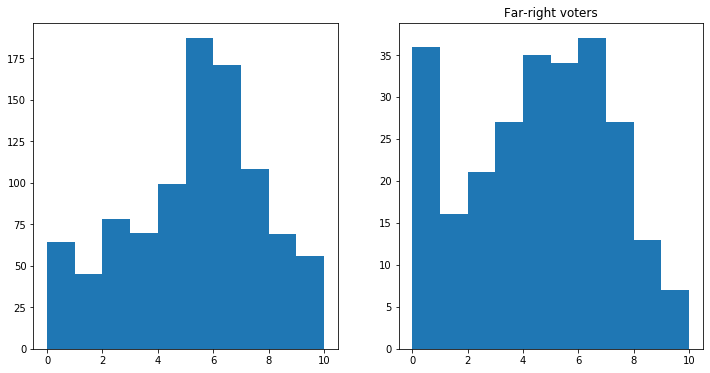

In [76]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
axes[0].hist(it_nof['t_eu_par']);
axes[1].hist(it_f['t_eu_par']);
axes[1].set_title("Far-right voters");

#### PL

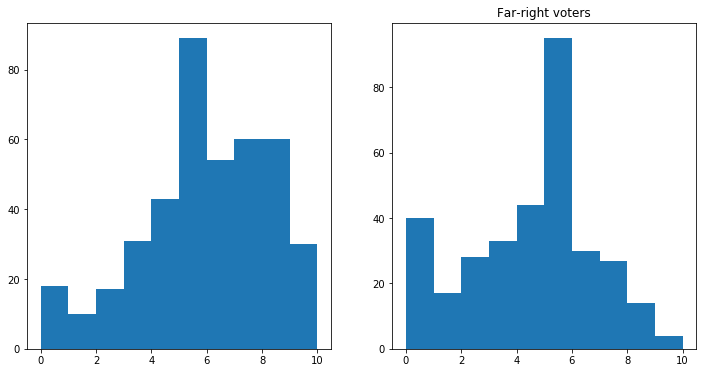

In [77]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
axes[0].hist(pl_nof['t_eu_par']);
axes[1].hist(pl_f['t_eu_par']);
axes[1].set_title("Far-right voters");

#### HU

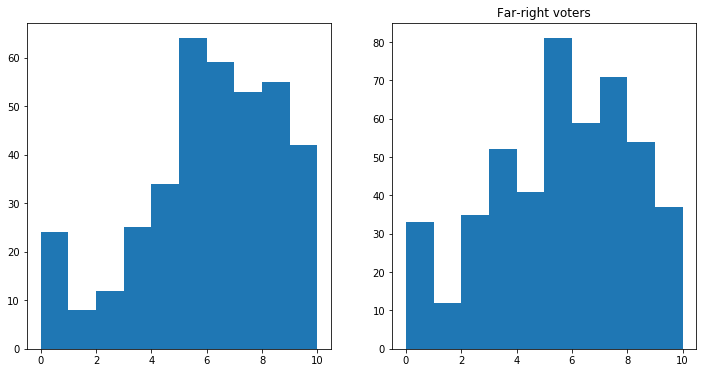

In [78]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
axes[0].hist(hu_nof['t_eu_par']);
axes[1].hist(hu_f['t_eu_par']);
axes[1].set_title("Far-right voters");

### eu_further: European unification go further or gone too far
##### 0 (already gone too far) - 10 (unification go further), 77, 88, 99
#### DE

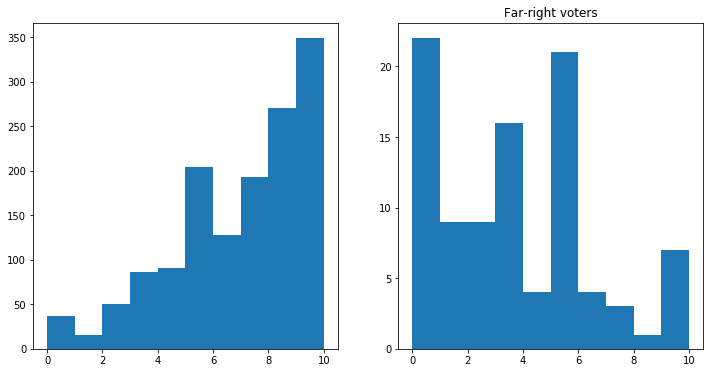

In [79]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
axes[0].hist(de_nof['eu_further']);
axes[1].hist(de_f['eu_further']);
axes[1].set_title("Far-right voters");

#### FR

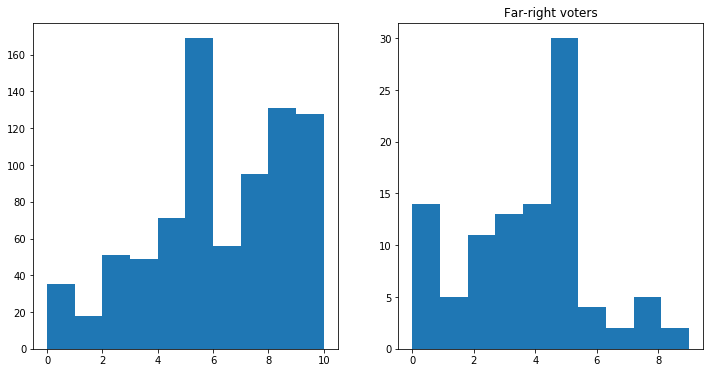

In [80]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
axes[0].hist(fr_nof['eu_further']);
axes[1].hist(fr_f['eu_further']);
axes[1].set_title("Far-right voters");

#### IT

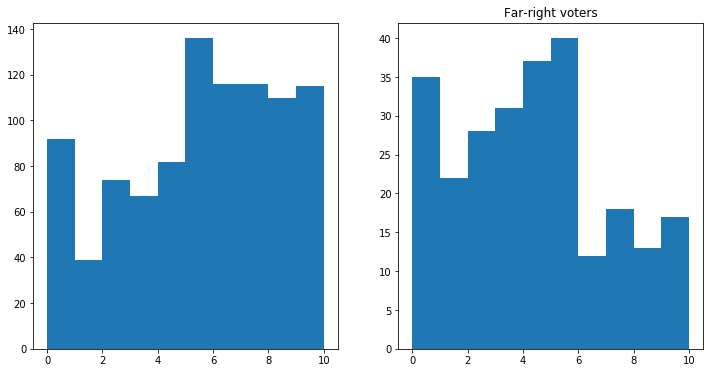

In [81]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
axes[0].hist(it_nof['eu_further']);
axes[1].hist(it_f['eu_further']);
axes[1].set_title("Far-right voters");

#### PL

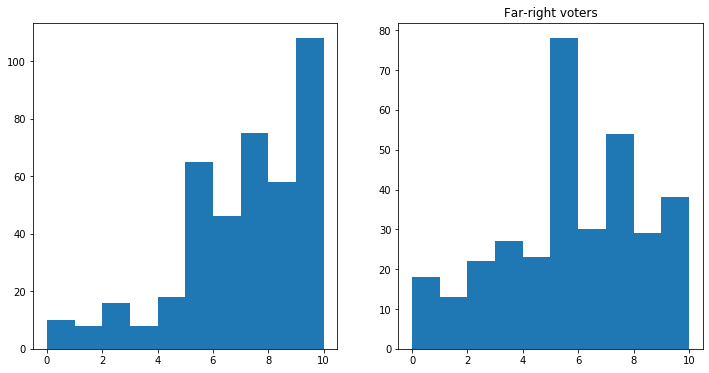

In [82]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
axes[0].hist(pl_nof['eu_further']);
axes[1].hist(pl_f['eu_further']);
axes[1].set_title("Far-right voters");

#### HU

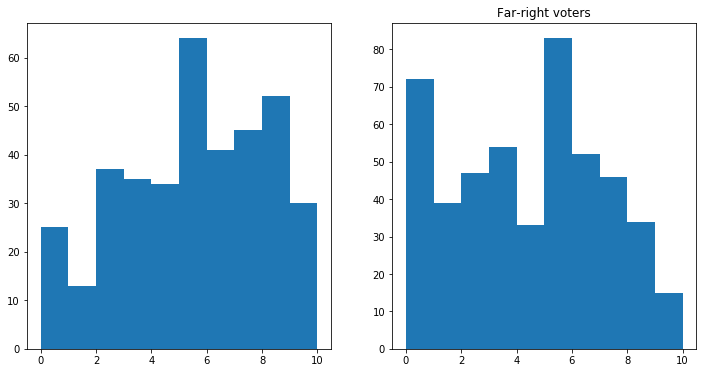

In [83]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
axes[0].hist(hu_nof['eu_further']);
axes[1].hist(hu_f['eu_further']);
axes[1].set_title("Far-right voters");